In [1]:
import numpy as np
from sklearn import preprocessing

# Data Preprocessing

In [2]:
data = np.array([[3, -1.5,  2, -5.4], 
                 [0,  4,  -0.3, 2.1], 
                 [1,  3.3, -1.9, -4.3]])

In [3]:
# Mean removal
data_standardized = preprocessing.scale(data) # defaults to scaling to a std normal
print "Mean          = ", data_standardized.mean(axis=0) # mean s/b 0
print "Std Deviation = ", data_standardized.std(axis=0)  # std dev s/b 1

Mean          =  [  5.55111512e-17  -1.11022302e-16  -7.40148683e-17  -7.40148683e-17]
Std Deviation =  [ 1.  1.  1.  1.]


In [4]:
# Scaling data
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # scales features to (0,1)
data_scaled = data_scaler.fit_transform(data)
print "Min max scaled data = \n", data_scaled

Min max scaled data = 
[[ 1.          0.          1.          0.        ]
 [ 0.          1.          0.41025641  1.        ]
 [ 0.33333333  0.87272727  0.          0.14666667]]


In [5]:
# Normalized data
data_normalized = preprocessing.normalize(data, norm='l1')
print "L1 normalized data = \n", data_normalized

L1 normalized data = 
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [6]:
# Binarization
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print "Binarized data = \n", data_binarized

Binarized data = 
[[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  0.  0.]]


In [7]:
# One Hot Encoding
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12],
             [1, 3, 5, 3 ],
             [2, 3, 2, 12],
             [1, 2, 4, 3 ]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print "Encoded vector = \n", encoded_vector

Encoded vector = 
[[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]]


In [8]:
print "Categories = [[0, 1, 2]]   ", encoded_vector[:, 0:3]
print "Categories = [[2, 3]]      ", encoded_vector[:, 3:5]
print "Categories = [[1, 2, 4, 5]]", encoded_vector[:, 5:9]
print "Categories = [[3, 12]]     ", encoded_vector[:, 9:]

Categories = [[0, 1, 2]]    [[ 0.  0.  1.]]
Categories = [[2, 3]]       [[ 0.  1.]]
Categories = [[1, 2, 4, 5]] [[ 0.  0.  0.  1.]]
Categories = [[3, 12]]      [[ 1.  0.]]


In [9]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']
label_encoder.fit(input_classes)
print "Class Mapping"
for i, item in enumerate(label_encoder.classes_):
    print '  ', item, '-->', i

Class Mapping
   audi --> 0
   bmw --> 1
   ford --> 2
   toyota --> 3


In [10]:
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print "Labels =        ", labels
print "Encoded labels =", list(encoded_labels)

Labels =         ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]


In [11]:
encoded_labels = [2,1,0,3,1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print "Encoded labels =", encoded_labels
print "Decoded labels =", decoded_labels

Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford' 'bmw' 'audi' 'toyota' 'bmw']


# Regression

In [12]:
import pandas as pd

In [13]:
# Going rogue from the example to use SKLearn and Pandas
#reg_data = pd.read_csv("data/data_singlevar.txt", names=['X', 'y'])

reg_data = np.genfromtxt("data/data_singlevar.txt", delimiter=',')
X, y = reg_data[:, :-1], reg_data[:,1]
print X.shape
print y.shape

(50, 1)
(50,)


In [14]:
# Thought it better to use train test split than the manual formula... will result in some different answers though
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train = X_train.reshape(-1,1) # had to reshape the X vectors to fix warnings
X_test = X_test.reshape(-1,1)

print X_train.shape
print y_train.shape

(40, 1)
(40,)


In [15]:
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

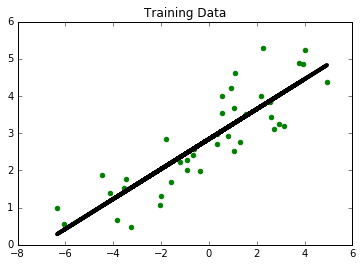

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train)
plt.figure
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, y_train_pred, color = 'black', linewidth=4)
plt.title('Training Data')

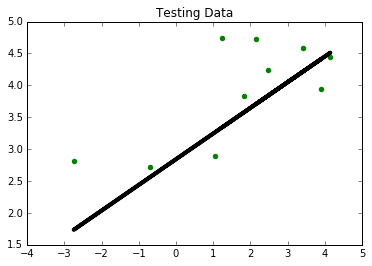

In [17]:
# now how does the prediction do on the hold out set?
y_test_pred = linear_regressor.predict(X_test)

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_test_pred, color = 'black', linewidth=4)
plt.title('Testing Data')

In [18]:
# Model metrics
import sklearn.metrics as sm

print "Mean absolute error      =", round(sm.mean_absolute_error(y_test, y_test_pred), 4)
print "Mean squared error       =", round(sm.mean_squared_error(y_test, y_test_pred), 4)
print "Median absolute error    =", round(sm.median_absolute_error(y_test, y_test_pred), 4)
print "Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 4)
print "R-squared score          =", round(sm.r2_score(y_test, y_test_pred), 4)

Mean absolute error      = 0.5629
Mean squared error       = 0.4953
Median absolute error    = 0.3911
Explained variance score = 0.4
R-squared score          = 0.1551


# Multivariate Regression

In [19]:
reg_data = np.genfromtxt("data/data_multivar.txt", delimiter=',')
X, y = reg_data[:, :-1], reg_data[:,-1]
print X.shape
print y.shape
print reg_data.shape
#print y[:5]

(500, 3)
(500,)
(500, 4)


In [20]:
# Thought it better to use train test split than the manual formula... will result in some different answers though

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#X_train = X_train.reshape(-1,1) # had to reshape the X vectors to fix warnings
#X_test = X_test.reshape(-1,1)
print X_train.shape
print X_test.shape
print y_test.shape

(400, 3)
(100, 3)
(100,)


In [21]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_test_pred = linear_regressor.predict(X_test)
y_diff = y_test - y_test_pred
linear_regressor.coef_

array([ 3.38869519,  1.19635448, -2.61733302])

In [22]:
print "Mean absolute error      =", round(sm.mean_absolute_error(y_test, y_test_pred), 4)
print "Mean squared error       =", round(sm.mean_squared_error(y_test, y_test_pred), 4)
print "Median absolute error    =", round(sm.median_absolute_error(y_test, y_test_pred), 4)
print "Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 4)
print "R-squared score          =", round(sm.r2_score(y_test, y_test_pred), 4)

Mean absolute error      = 3.5448
Mean squared error       = 20.004
Median absolute error    = 2.959
Explained variance score = 0.8566
R-squared score          = 0.8566


# Ridge Regression

In [23]:
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
ridge_regressor.fit(X_train, y_train) 
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [24]:
print "Mean absolute error      =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 4)
print "Mean squared error       =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 4)
print "Median absolute error    =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 4)
print "Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 4)
print "R-squared score          =", round(sm.r2_score(y_test, y_test_pred_ridge), 4)

Mean absolute error      = 3.5448
Mean squared error       = 20.004
Median absolute error    = 2.959
Explained variance score = 0.8566
R-squared score          = 0.8566


# Polynomial regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3)
X_train_transformed = polynomial.fit_transform(X_train)

In [26]:
datapoint = [0.39, 2.78, 7.11]
poly_datapoint = polynomial.fit_transform(datapoint)
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print "Linear regression:    ", linear_regressor.predict(datapoint)[0]
print "Polynomial regression:", poly_linear_model.predict(poly_datapoint)[0]

/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

Linear regression:     -10.6632717025
Polynomial regression: -10.7185992549


In [27]:
polynomial = PolynomialFeatures(degree=10)
X_train_transformed = polynomial.fit_transform(X_train)
datapoint = [0.39, 2.78, 7.11]
poly_datapoint = polynomial.fit_transform(datapoint)
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print "Linear regression:    ", linear_regressor.predict(datapoint)[0]
print "Polynomial regression:", poly_linear_model.predict(poly_datapoint)[0]

/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

Linear regression:     -10.6632717025
Polynomial regression: -21.9397037222
